In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/content/a.xlsx')
data

,name,age,מין,e1,q1e1,q2e1,q3e1,q4e1,q5e1,q6e1,...,q1e2,q2e2,q3e2,q4e2,q5e2,q6e2,object_2,Verbal_2,visual_2,physical_2
0,Student 1,27.00,m,vvsd,84.0,8.0,4.0,38.0,28.0,59.0,...,22.0,44.0,6.0,29.0,14.0,20.0,yes,4.0,4.0,2.0
1,Student 2,40.00,m,vvsd,4.0,9.0,19.0,4.0,32.0,2.0,...,5.0,6.0,22.0,10.0,31.0,6.0,yes,5.0,5.0,4.0
2,Student 3,30.00,m,vvsd,28.0,20.0,7.0,16.0,48.0,16.0,...,16.0,6.0,68.0,15.0,6.0,0.0,no,3.0,1.0,1.0
3,Student 4,32.00,f,vsd,2.0,2.0,2.0,9.0,5.0,3.0,...,9.0,5.0,9.0,5.0,3.0,3.0,no,1.0,1.0,1.0
4,NaN,32.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


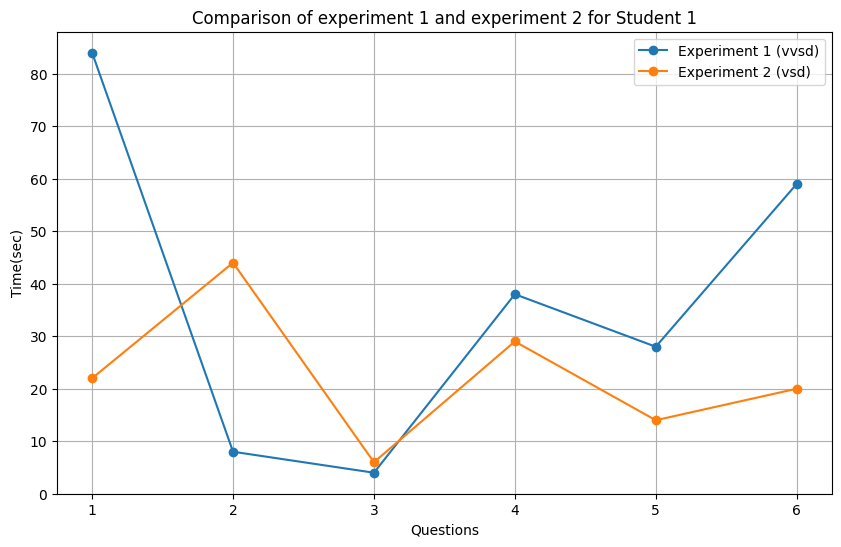

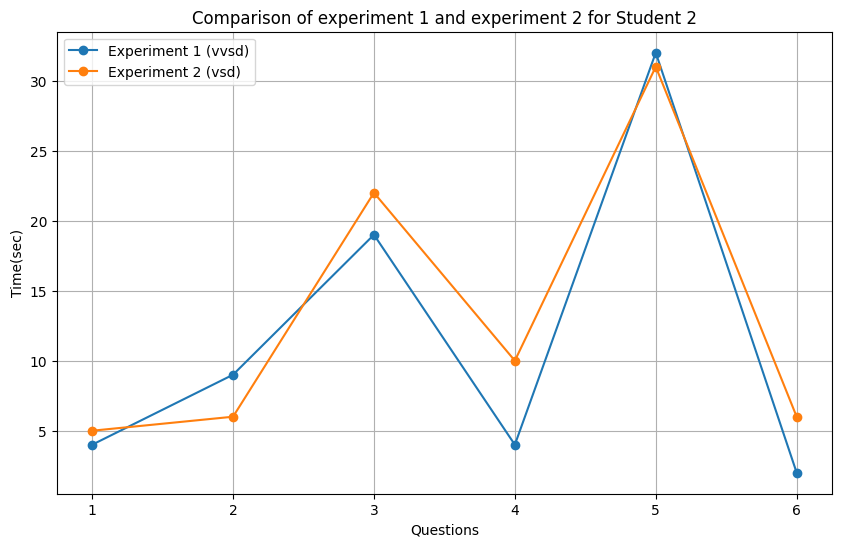

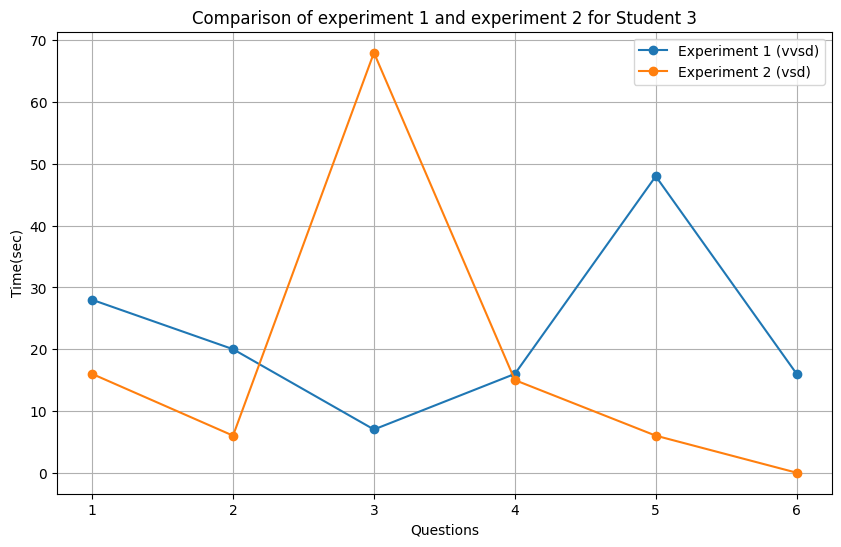

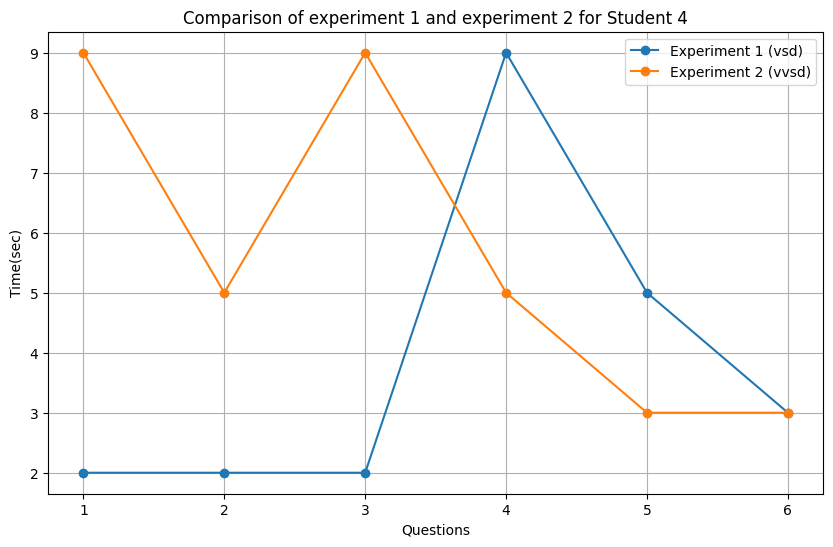

In [ ]:
for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

   # Get the experiment types
    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(['1', '2', '3', '4', '5', '6'], subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].values.flatten(), marker='o', label=f'Experiment 1 ({exp_type_e1})')
    plt.plot(['1', '2', '3', '4', '5', '6'], subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].values.flatten(), marker='o', label=f'Experiment 2 ({exp_type_e2})')

    # Add labels and title
    plt.title(f'Comparison of experiment 1 and experiment 2 for {name}')
    plt.xlabel('Questions')
    plt.ylabel('Time(sec)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

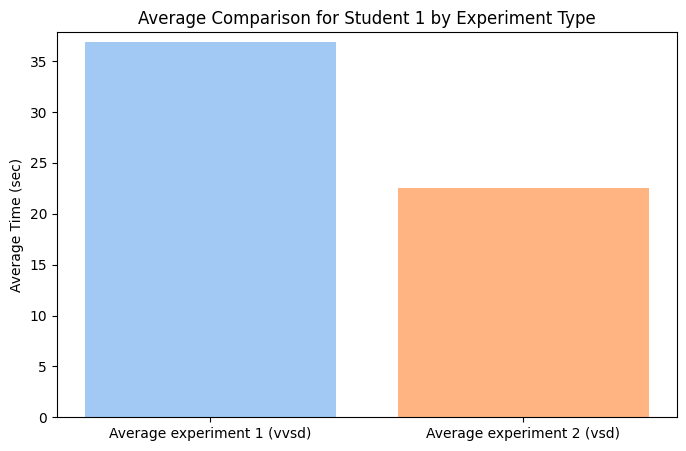

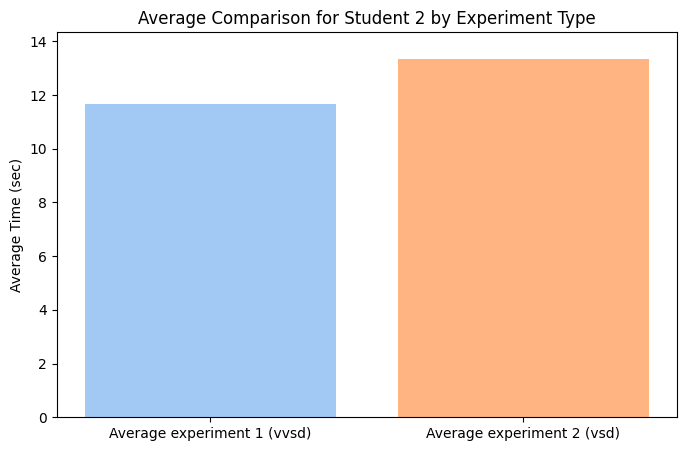

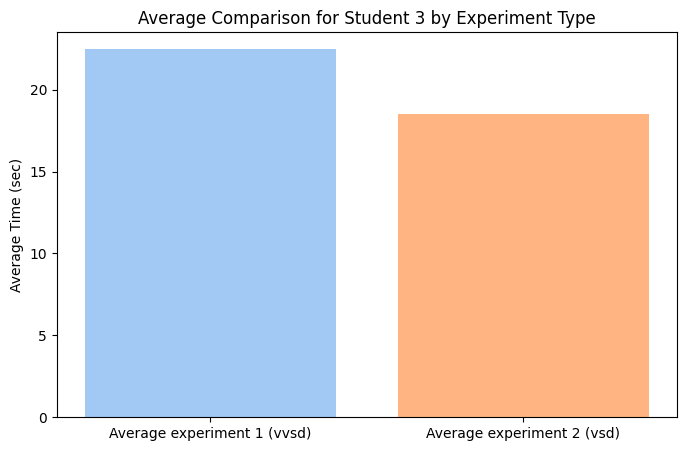

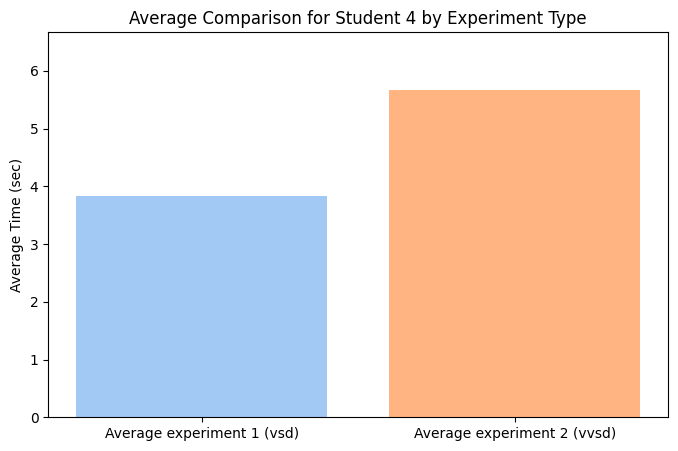

Skipping nan: no data available.


In [7]:
# Define pastel colors
colors = sns.color_palette("pastel")

for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

    # Check if the subset is not empty
    if not subset.empty:
        # Calculate the averages
        avg_e1 = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values[0]
        avg_e2 = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values[0]

        # Get the experiment types
        exp_type_e1 = subset['e1'].values[0]
        exp_type_e2 = subset['e2'].values[0]

        # Create a bar chart to compare the averages with experiment types
        plt.figure(figsize=(8, 5))
        plt.bar([f'Average experiment 1 ({exp_type_e1})', f'Average experiment 2 ({exp_type_e2})'], [avg_e1, avg_e2], color=colors[:2])

        # Add labels and title
        plt.title(f'Average Comparison for {name} by Experiment Type')
        plt.ylabel('Average Time (sec)')
        plt.ylim(0, max(avg_e1, avg_e2) + 1)  # Adjust y-limit for better visibility

        # Show the plot
        plt.show()
    else:
        print(f"Skipping {name}: no data available.")

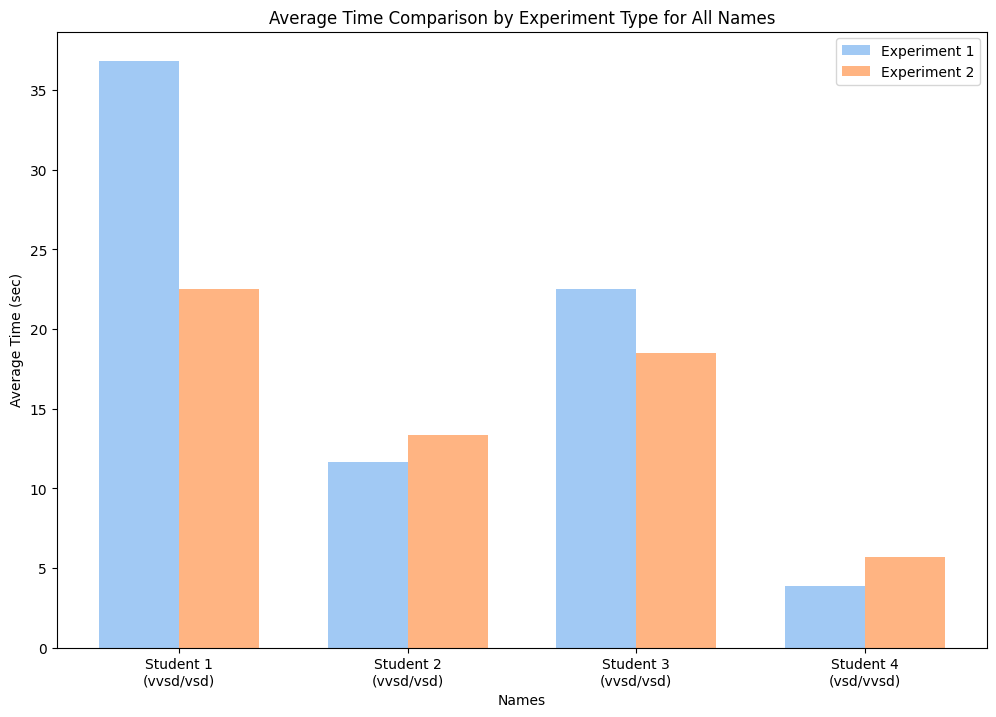

In [9]:

# Define pastel colors using Seaborn
colors = sns.color_palette("pastel")

# Prepare to collect data for all names
names = []
avg_e1_list = []
avg_e2_list = []
exp_type_e1_list = []
exp_type_e2_list = []

# Loop through each unique name and calculate averages
for name in data['name'].unique():
    subset = data[data['name'] == name]

    if subset.empty:
        print(f"Warning: No data available for {name}. Skipping.")
        continue

    avg_e1 = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values
    avg_e2 = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values

    if avg_e1.size == 0 or avg_e2.size == 0:
        print(f"Warning: Missing data for {name}. Skipping.")
        continue

    avg_e1 = avg_e1[0]
    avg_e2 = avg_e2[0]

    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]

    names.append(name)
    avg_e1_list.append(avg_e1)
    avg_e2_list.append(avg_e2)
    exp_type_e1_list.append(exp_type_e1)
    exp_type_e2_list.append(exp_type_e2)

# Create a bar chart for all names
x = np.arange(len(names))  # the label locations

plt.figure(figsize=(12, 8))

# Width of the bars
width = 0.35

# Plot the data using pastel colors
plt.bar(x - width/2, avg_e1_list, width, label='Experiment 1', color=colors[0])
plt.bar(x + width/2, avg_e2_list, width, label='Experiment 2', color=colors[1])

# Add labels and title
plt.xlabel('Names')
plt.ylabel('Average Time (sec)')
plt.title('Average Time Comparison by Experiment Type for All Names')
plt.xticks(x, [f'{name}\n({e1}/{e2})' for name, e1, e2 in zip(names, exp_type_e1_list, exp_type_e2_list)])
plt.legend()

# Show the plot
plt.show()


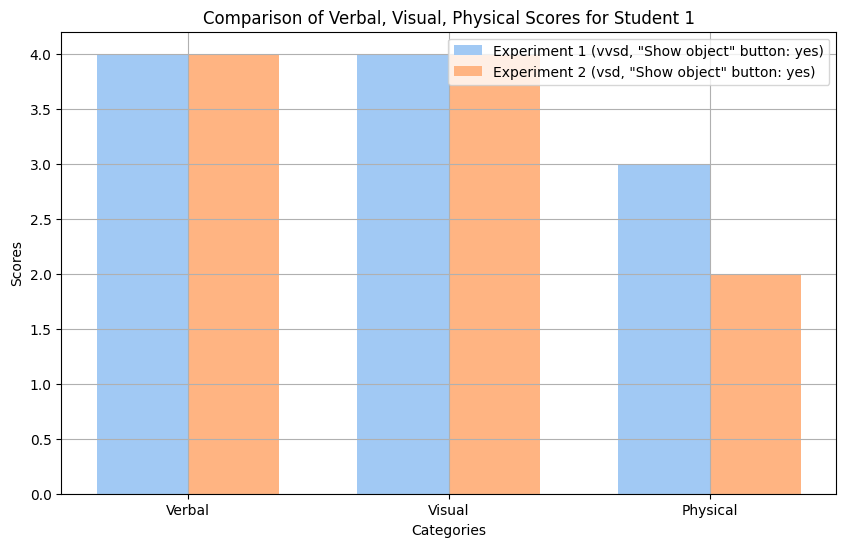

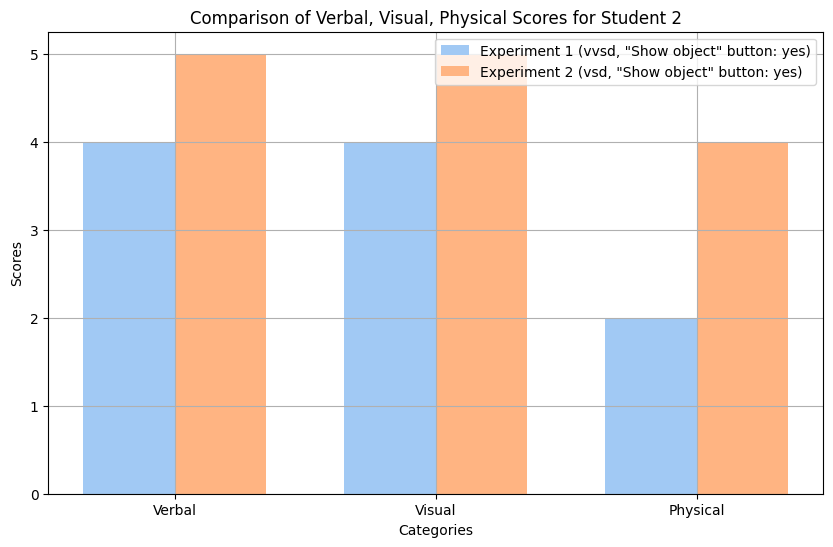

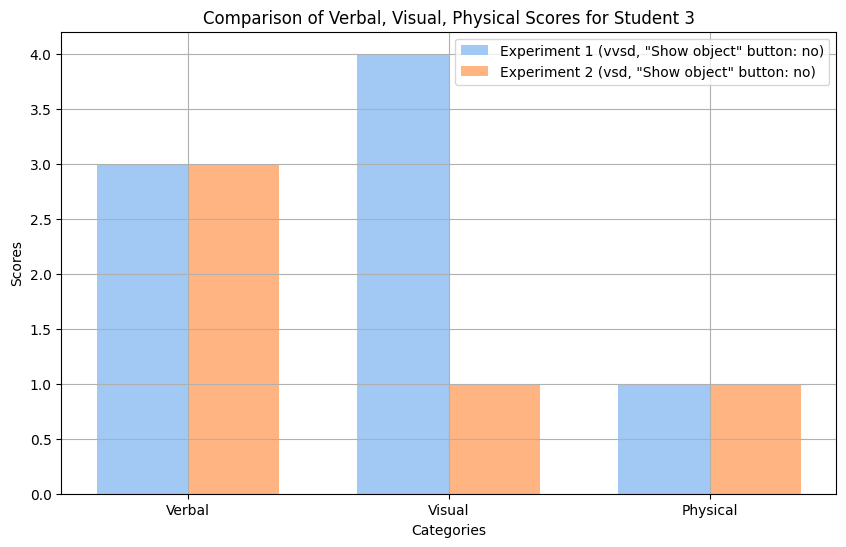

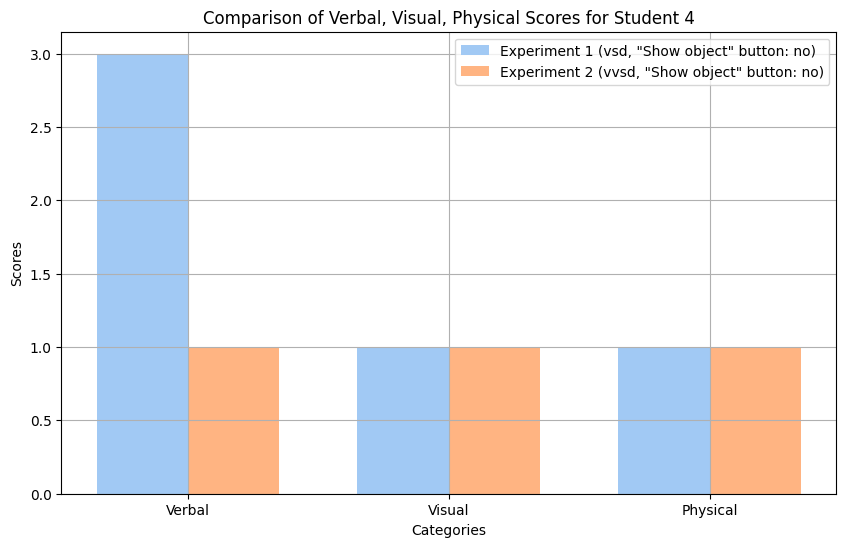

No data available for nan


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define pastel colors
colors = sns.color_palette("pastel")

for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

    # Check if the subset is empty
    if subset.empty:
        print(f"No data available for {name}")
        continue

    # Get the experiment types and button usage
    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]
    button_used_e1 = subset['object_1'].values[0]
    button_used_e2 = subset['object_2'].values[0]

    # Extract the Verbal, Visual, Physical data for both experiments
    e1_scores = subset[['Verbal_1', 'visual_1', 'physical_1']].values.flatten()
    e2_scores = subset[['Verbal_2', 'visual_2', 'physical_2']].values.flatten()

    # Create a bar chart
    categories = ['Verbal', 'Visual', 'Physical']
    x = np.arange(len(categories))  # the label locations

    plt.figure(figsize=(10, 6))

    # Width of the bars
    width = 0.35

    # Plot the data with pastel colors
    plt.bar(x - width/2, e1_scores, width, label=f'Experiment 1 ({exp_type_e1}, "Show object" button: {button_used_e1})', color=colors[0])
    plt.bar(x + width/2, e2_scores, width, label=f'Experiment 2 ({exp_type_e2}, "Show object" button: {button_used_e2})', color=colors[1])

    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Scores')
    plt.title(f'Comparison of Verbal, Visual, Physical Scores for {name}')
    plt.xticks(x, categories)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


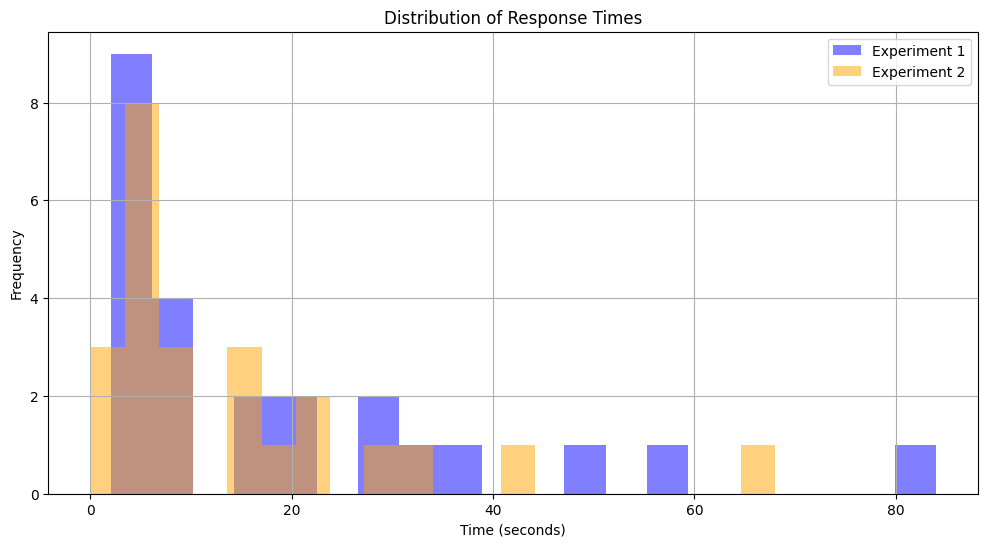

In [ ]:

# Flatten data for histograms
e1_times = data[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].values.flatten()
e2_times = data[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].values.flatten()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(e1_times, bins=20, alpha=0.5, label='Experiment 1', color='blue')
plt.hist(e2_times, bins=20, alpha=0.5, label='Experiment 2', color='orange')
plt.title('Distribution of Response Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()